<a href="https://colab.research.google.com/github/RuyaAltuntas/LicensePlateRecognitionSystem/blob/main/LicensePlateRecognitionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00


In [2]:
from google.colab import files

uploaded = files.upload()

Saving my_pla2.v1i.yolov8.zip to my_pla2.v1i.yolov8.zip


In [3]:
import zipfile
import os

zip_path = "my_pla2.v1i.yolov8.zip"
extract_path = "my_pla2_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Show extracted structure
os.listdir(extract_path)


['train', 'data.yaml', 'README.roboflow.txt', 'README.dataset.txt', 'valid']

In [4]:
with open(f"{extract_path}/data.yaml", 'r') as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['my_pla2']

roboflow:
  workspace: metehan-yasar
  project: my_pla2
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/metehan-yasar/my_pla2/dataset/1


In [5]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 segmentation model (nano = small & fast)
model = YOLO("yolov8n-seg.pt")

# Train the model
model.train(
    data=f"{extract_path}/data.yaml",
    epochs=10,
    imgsz=640
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 171MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=my_pla2_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 37.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 118MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 590.8±336.2 MB/s, size: 12.2 KB)


train: Scanning /content/my_pla2_data/train/labels... 2961 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2961/2961 [00:01<00:00, 1979.98it/s]


train: New cache created: /content/my_pla2_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 181.2±100.1 MB/s, size: 5.9 KB)


val: Scanning /content/my_pla2_data/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 1408.18it/s]

val: New cache created: /content/my_pla2_data/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.52G     0.8178      1.105      1.481      1.255          1        640: 100%|██████████| 186/186 [01:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        110        110      0.981          1      0.995      0.868      0.981          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.69G     0.5398     0.5263     0.5977     0.9901          1        640: 100%|██████████| 186/186 [00:58<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        110        110      0.999          1      0.995      0.882      0.999          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.7G      0.494     0.5148     0.4106     0.9602          1        640: 100%|██████████| 186/186 [00:59<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        110        110       0.99          1      0.995      0.896       0.99          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.73G     0.4592     0.4993     0.3423     0.9358          1        640: 100%|██████████| 186/186 [00:58<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        110        110      0.999          1      0.995      0.903       0.99      0.991      0.995      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.73G     0.4119     0.4682     0.2948     0.9024          1        640: 100%|██████████| 186/186 [00:59<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        110        110      0.999          1      0.995       0.93      0.999          1      0.995      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.76G     0.3687     0.4472     0.2616     0.8911          1        640: 100%|██████████| 186/186 [00:58<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        110        110          1          1      0.995      0.942          1          1      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.77G     0.3446     0.4427     0.2459     0.8777          1        640: 100%|██████████| 186/186 [00:59<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        110        110      0.999          1      0.995      0.959      0.999          1      0.995      0.943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.8G     0.3123     0.4294     0.2192     0.8632          1        640: 100%|██████████| 186/186 [01:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        110        110          1          1      0.995      0.962          1          1      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.81G     0.2962     0.4237     0.2051     0.8593          1        640: 100%|██████████| 186/186 [00:59<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        110        110      0.999          1      0.995      0.965      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.84G     0.2704     0.4117     0.1879     0.8423          1        640: 100%|██████████| 186/186 [01:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        110        110          1          1      0.995      0.967          1          1      0.995      0.956



10 epochs completed in 0.171 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all        110        110      0.999          1      0.995      0.965      0.999          1      0.995      0.958
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1e4247c610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [7]:
from google.colab import files
uploaded = files.upload()  # Upload images manually here


Saving test_image_folder.zip to test_image_folder.zip


In [8]:
# Step 1: Unzip your uploaded file
import zipfile
import os

zip_path = "test_image_folder.zip"
extract_folder = "test_image_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted files to '{extract_folder}':")
print(os.listdir(extract_folder))


Extracted files to 'test_image_folder':
['test_image_folder']


In [14]:
import os

extract_folder = "test_image_folder"
print("Files in the extracted folder:")
print(os.listdir(extract_folder))


Files in the extracted folder:
['test_image_folder']


In [15]:
test_image_path = os.path.join(extract_folder, "OZEL_PLAKA_02.png")  # update to actual extension


In [16]:
import os

nested_folder = "test_image_folder/test_image_folder"
print("Files in the nested folder:")
print(os.listdir(nested_folder))


Files in the nested folder:
['OZEL_PLAKA_02.jpg']


In [17]:
test_image_path = os.path.join(nested_folder, "OZEL_PLAKA_02.jpg")  # or actual extension



image 1/1 /content/test_image_folder/test_image_folder/test.png: 192x640 1 my_pla2, 50.7ms
Speed: 1.0ms preprocess, 50.7ms inference, 2.7ms postprocess per image at shape (1, 3, 192, 640)


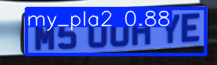

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8782], device='cuda:0')
data: tensor([[ 26.4050,   8.1560, 205.7841,  54.9746,   0.8782,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (65, 217)
shape: torch.Size([1, 6])
xywh: tensor([[116.0945,  31.5653, 179.3790,  46.8185]], device='cuda:0')
xywhn: tensor([[0.5350, 0.4856, 0.8266, 0.7203]], device='cuda:0')
xyxy: tensor([[ 26.4050,   8.1560, 205.7841,  54.9746]], device='cuda:0')
xyxyn: tensor([[0.1217, 0.1255, 0.9483, 0.8458]], device='cuda:0')


In [35]:
from ultralytics import YOLO

# Load your trained model weights
model = YOLO('runs/segment/train/weights/best.pt')  # adjust path if needed

# Path to your test image
test_image_path = 'test_image_folder/test_image_folder/OZEL_PLAKA_02.jpg'

# Run inference
results = model('/content/test_image_folder/test_image_folder/test.png', conf=0.1)



# Show results for the first image
results[0].show()

# Save results to the default location
results[0].save()

print(results[0].boxes)



image 1/1 /content/my_pla2_data/train/images/01_113_jpg.rf.ac7686933273052ae24f4fba3c3957a7.jpg: 256x640 1 my_pla2, 55.5ms
Speed: 4.3ms preprocess, 55.5ms inference, 14.6ms postprocess per image at shape (1, 3, 256, 640)
Inference results for training image: my_pla2_data/train/images/01_113_jpg.rf.ac7686933273052ae24f4fba3c3957a7.jpg


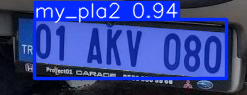

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9359], device='cuda:0')
data: tensor([[ 34.3162,  19.4553, 226.2541,  78.3646,   0.9359,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (95, 247)
shape: torch.Size([1, 6])
xywh: tensor([[130.2851,  48.9099, 191.9379,  58.9093]], device='cuda:0')
xywhn: tensor([[0.5275, 0.5148, 0.7771, 0.6201]], device='cuda:0')
xyxy: tensor([[ 34.3162,  19.4553, 226.2541,  78.3646]], device='cuda:0')
xyxyn: tensor([[0.1389, 0.2048, 0.9160, 0.8249]], device='cuda:0')


In [30]:
# Try running inference on a training image
# You might need to update the path below to a specific image in your training data
train_image_path = 'my_pla2_data/train/images/01_113_jpg.rf.ac7686933273052ae24f4fba3c3957a7.jpg' # Replace with a real image path from your training data

try:
    results_train = model(train_image_path, conf=0.7
    print(f"Inference results for training image: {train_image_path}")
    results_train[0].show()
    print(results_train[0].boxes)
except Exception as e:
    print(f"An error occurred during inference on the training image: {e}")

In [29]:
# List files in the training images directory
!ls my_pla2_data/train/images/

01_113_jpg.rf.ac7686933273052ae24f4fba3c3957a7.jpg
01_113_jpg.rf.bbd469de266bd8ee91e2222774aecd8b.jpg
01_113_jpg.rf.e2464a48d4123ef2ba785b34e3e6f290.jpg
01_114_jpg.rf.06ede46dc8bfc2b33bbc6e7baff4c373.jpg
01_114_jpg.rf.1f12a20578bd8b8fdf8475c70aa468c1.jpg
01_114_jpg.rf.b5f667bb42656de78b3bfab64b4a32e5.jpg
01_118_jpg.rf.42bb08a9b40d4e0b7dd6058d2bf5f67a.jpg
01_118_jpg.rf.d4fe21ec4b6c205e4f7df19429379fb4.jpg
01_118_jpg.rf.f13d2ff0e67477f0b13547051b6f7d38.jpg
01_120_jpg.rf.369ae7ecc6343a2b07c6405841880e5c.jpg
01_120_jpg.rf.d8c7eb1f1cc15737a9b038a019189419.jpg
01_120_jpg.rf.eec861d1620ef2922058f103e9c69815.jpg
01_121_jpg.rf.23231413bf5f8b204b2ac7988e461688.jpg
01_121_jpg.rf.c417921337c1a41942459c759a981e50.jpg
01_121_jpg.rf.ecaf79db058f97b5323f95b8e8cc9ea4.jpg
01_136_jpg.rf.610ae6b856fbdf1a4f92b40789d6dc4c.jpg
01_136_jpg.rf.6f791ca6d25eead4b10fed360cb83e92.jpg
01_136_jpg.rf.97dd54102be42af46eaec564aee69ab1.jpg
01_162_jpg.rf.6391316b6f1c29b0db2b4efb1752f53d.jpg
01_162_jpg.rf.7c8853589b4baa702